## **INSTALLATIONS**

In [1]:
pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=a941acfe8c58e739a972fc12087ae2d990d943ca6195bd9212ddf3678e6acebe
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [2]:

!pip install tensorflow_hub
!pip install keras tf-models-official pydot graphviz

In [3]:
!pip install transformers

# **LIBRARIES**

In [4]:
#general purpose packages
import numpy as np
import pandas as pd
from cleantext import clean
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
#import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<ipython-input-4-9dc5f26ec6f1>:45: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

# **IMPORT** **DATASET**

In [5]:
dataset = pd.read_csv('descriptive.csv', encoding='cp1252')

# **WORKING**

In [6]:
dataset.head()

,Answer,Rate
0,The action limit is reached when the acceptanc...,good
1,The action limit is the level of a parameter s...,average
2,Don’t know. May be it is theaction that holds ...,bad
3,Action limits or “action levels” means the min...,good
4,Values less than the minimum or greater than t...,good


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Answer  1003 non-null   object
 1   Rate    1003 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [7]:
dataset.shape

(1003, 2)

In [8]:
dataset.Rate

0          good
1       average
2           bad
3          good
4          good
         ...   
998     average
999         bad
1000        bad
1001        bad
1002       good
Name: Rate, Length: 1003, dtype: object

In [9]:
dataset.Answer

0       The action limit is reached when the acceptanc...
1       The action limit is the level of a parameter s...
2       Don’t know. May be it is theaction that holds ...
3       Action limits or “action levels” means the min...
4       Values less than the minimum or greater than t...
                              ...                        
998     Parenteral administration is commonly used whe...
999     Parenteral drugs, which may be a biologic or s...
1000    Wrong dose, missing doses, and wrong medicatio...
1001    enteral routes use the digestive system, inclu...
1002    parenteral route completely bypasses the diges...
Name: Answer, Length: 1003, dtype: object

In [12]:
classes = dataset['Rate'].unique()
print(classes)

['good' 'average' 'bad']


In [13]:
dataset.isna().sum()

Answer    0
Rate      0
dtype: int64

In [14]:
dataset=dataset.dropna()

In [15]:
dataset.shape

(1003, 2)

In [16]:
dataset.isnull().sum()

Answer    0
Rate      0
dtype: int64

# **FUNCTIONS**

In [17]:
#Function for removing the emojis
def rem_emoji(str):
  cleaned_data=clean(str, no_emoji=True)
  return cleaned_data

In [18]:
#Function for removing non alphabetical values
def remove_nonalpha(str):
  new_str=re.sub(r'[^a-zA-Z\s]','',str)
  return new_str

In [19]:
#Function for removing html codes
CLEANR = re.compile('<.*?>')

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [20]:
#Function for removing non-english words
nltk.download('words')
words = set(nltk.corpus.words.words())
def remove_non_eng(str):
   b= " ".join(w for w in nltk.wordpunct_tokenize(str) if w.lower() in words or not w.isalpha())
   return b

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [21]:
#Function for removing the stopwords
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "ago","against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = str(sentence).lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

#dataset['Answer']=dataset['Answer'].apply(lambda x:remove_stopwords(x))




# **APPLY FUNCTIONS ON DATASET**

REMOVING EMOJIS


In [22]:
dataset['Clean_Answer']=""
dataset['Clean_Answer'] = dataset['Answer'].apply(rem_emoji)

In [23]:
dataset

,Answer,Rate,Clean_Answer
0,The action limit is reached when the acceptanc...,good,the action limit is reached when the acceptanc...
1,The action limit is the level of a parameter s...,average,the action limit is the level of a parameter s...
2,Don’t know. May be it is theaction that holds ...,bad,don't know. may be it is theaction that holds ...
3,Action limits or “action levels” means the min...,good,"action limits or ""action levels"" means the min..."
4,Values less than the minimum or greater than t...,good,values less than the minimum or greater than t...
...,...,...,...
998,Parenteral administration is commonly used whe...,average,parenteral administration is commonly used whe...
999,"Parenteral drugs, which may be a biologic or s...",bad,"parenteral drugs, which may be a biologic or s..."
1000,"Wrong dose, missing doses, and wrong medicatio...",bad,"wrong dose, missing doses, and wrong medicatio..."
1001,"enteral routes use the digestive system, inclu...",bad,"enteral routesuse the digestive system, includ..."


In [24]:
dataset=dataset.drop('Answer',axis=1)


In [25]:
dataset

,Rate,Clean_Answer
0,good,the action limit is reached when the acceptanc...
1,average,the action limit is the level of a parameter s...
2,bad,don't know. may be it is theaction that holds ...
3,good,"action limits or ""action levels"" means the min..."
4,good,values less than the minimum or greater than t...
...,...,...
998,average,parenteral administration is commonly used whe...
999,bad,"parenteral drugs, which may be a biologic or s..."
1000,bad,"wrong dose, missing doses, and wrong medicatio..."
1001,bad,"enteral routesuse the digestive system, includ..."


DROPING DUPLICATE ANSWERS

In [29]:
dataset = dataset.drop_duplicates('Clean_Answer')


In [30]:
dataset.head()

,Rate,Clean_Answer
0,good,the action limit is reached when the acceptanc...
1,average,the action limit is the level of a parameter s...
2,bad,don't know. may be it is theaction that holds ...
3,good,"action limits or ""action levels"" means the min..."
4,good,values less than the minimum or greater than t...


CLEANING HTML CODES

In [31]:
dataset['Clean_Answer'] = datset['Clean_Answer'].apply(cleanhtml)

<ipython-input-31-f6839e46a67d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Clean_Answer'] = datset['Clean_Answer'].apply(cleanhtml)


In [32]:
dataset

,Rate,Clean_Answer
0,good,the action limit is reached when the acceptanc...
1,average,the action limit is the level of a parameter s...
2,bad,don't know. may be it is theaction that holds ...
3,good,"action limits or ""action levels"" means the min..."
4,good,values less than the minimum or greater than t...
...,...,...
998,average,parenteral administration is commonly used whe...
999,bad,"parenteral drugs, which may be a biologic or s..."
1000,bad,"wrong dose, missing doses, and wrong medicatio..."
1001,bad,"enteral routesuse the digestive system, includ..."


REMOVING NON ENGLISH WORD

In [33]:
dataset['Clean_Answer'] = dataset['Clean_Answer'].apply(remove_non_eng)

<ipython-input-33-b96653279225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Clean_Answer'] = dataset['Clean_Answer'].apply(remove_non_eng)


In [34]:
dataset

,Rate,Clean_Answer
0,good,the action limit is when the acceptance criter...
1,average,the action limit is the level of a parameter s...
2,bad,don ' t know . may be it is that to exceed fro...
3,good,"action or "" action "" the minimum and maximum o..."
4,good,less than the minimum or greater than the maxi...
...,...,...
998,average,parenteral administration is commonly used whe...
999,bad,"parenteral , which may be a biologic or small ..."
1000,bad,"wrong dose , missing , and wrong medication ar..."
1001,bad,"enteral the digestive system , the mouth , sto..."


REMOVING NON ALPHABETICAL VALUES

In [35]:
dataset['Clean_Answer'] = dataset['Clean_Answer'].apply(remove_nonalpha)

<ipython-input-35-f5465b2e0a0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Clean_Answer'] = dataset['Clean_Answer'].apply(remove_nonalpha)


In [36]:
dataset

,Rate,Clean_Answer
0,good,the action limit is when the acceptance criter...
1,average,the action limit is the level of a parameter s...
2,bad,don t know may be it is that to exceed from ...
3,good,action or action the minimum and maximum of ...
4,good,less than the minimum or greater than the maxi...
...,...,...
998,average,parenteral administration is commonly used whe...
999,bad,parenteral which may be a biologic or small m...
1000,bad,wrong dose missing and wrong medication are ...
1001,bad,enteral the digestive system the mouth stoma...


REMOVING STOPWORDS


In [38]:
dataset['Clean_Answer']=dataset['Clean_Answer'].apply(lambda x:remove_stopwords(x))

<ipython-input-38-c8dea0962f30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Clean_Answer']=dataset['Clean_Answer'].apply(lambda x:remove_stopwords(x))


In [39]:
dataset

,Rate,Clean_Answer
0,good,action limit acceptance criteria critical para...
1,average,action limit level parameter set user immediat...
2,bad,don t know may exceed particular limit
3,good,action action minimum maximum quality assuranc...
4,good,less minimum greater maximum action limit leve...
...,...,...
998,average,parenteral administration commonly used oral a...
999,bad,parenteral may biologic small molecule
1000,bad,wrong dose missing wrong medication commonly a...
1001,bad,enteral digestive system mouth stomach small i...


In [40]:
dataset.to_csv('Descriptive_Cleaned.csv')

In [41]:
dataset.Rate.unique()

array(['good', 'average', 'bad'], dtype=object)

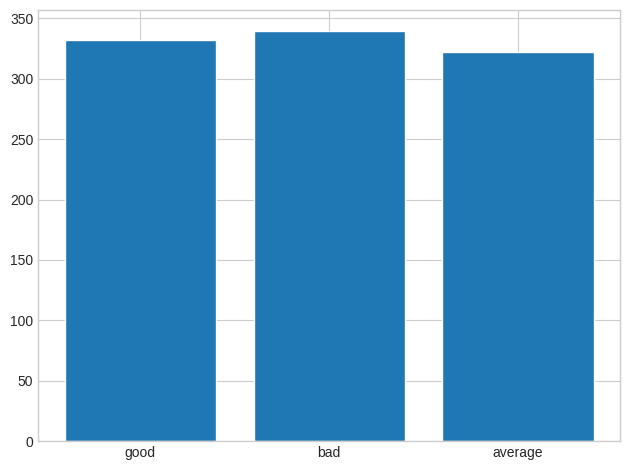

In [42]:
classes = dataset.Rate.unique()
counts = []

for i in classes:
  count = len(dataset[dataset.Rate==i])
  counts.append(count)

plt.bar(['good', 'bad', 'average'], counts)
plt.show()

##TOKENIZATION

In [43]:

import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet from NLTK
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmi(sentence):


    # Tokenize the sentence into individual words
    words = nltk.word_tokenize(sentence)

    # Lemmatize each word to its base form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = " ".join(lemmatized_words)

    # Print the original and lemmatized sentences

    return  lemmatized_sentence
dataset['Clean_Answer']=dataset['Clean_Answer'].apply(lambda x:lemmi(x))
dataset["Clean_Answer"]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-43-956d85fdf6b5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Clean_Answer']=dataset['Clean_Answer'].apply(lambda x:lemmi(x))


0       action limit acceptance criterion critical par...
1       action limit level parameter set user immediat...
2                  don t know may exceed particular limit
3       action action minimum maximum quality assuranc...
4       le minimum greater maximum action limit level ...
                              ...                        
998     parenteral administration commonly used oral a...
999                parenteral may biologic small molecule
1000    wrong dose missing wrong medication commonly a...
1001    enteral digestive system mouth stomach small i...
1002    parenteral route completely digestive system e...
Name: Clean_Answer, Length: 994, dtype: object

Specifying the maximum length

In [44]:
MAX_LEN=128

##CREATE FUNCTION FOR TOKENIZATION

In [45]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

##CREATING MODEL

In [46]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)


    return model

##TOKENIZER

In [47]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

TOKEN LENS

In [49]:
token_lens = []

for txt in dataset['Clean_Answer'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 42


In [51]:
token_lens = []

for i,txt in enumerate(dataset['Clean_Answer'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")


In [52]:
dataset['token_lens'] = token_lens

<ipython-input-52-8662371981ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['token_lens'] = token_lens


In [53]:
dataset = dataset.sort_values(by='token_lens', ascending=False)
dataset.head(7)

,Rate,Clean_Answer,token_lens
875,good,two substance highest concentration within mix...,42
968,good,lactose lactose monohydrate sugar sorbitol xyl...,33
908,good,syrup contain w v w w specific gravity w w w w...,31
965,good,diluent mannitol sorbitol starch lactose sucro...,31
595,good,common lubricant used pharmaceutical industry ...,30
5,average,microbial count reach action action mandatory ...,28
829,good,powder dry bulk solid composed many fine may f...,28


In [54]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [55]:
#In this step we are Encoding Our target variable which is Theme as we can see numbers from 0-6 have been assinged to every unique label
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Label=dataset['Rate']
Label=np.array(Label).reshape(-1,1)


dataset['encoded_labels']=''
enc=le.fit_transform(Label)

dataset['encoded_labels']=enc
dataset.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Rate,Clean_Answer,token_lens,encoded_labels
0,average,separation technique dynamic differential migr...,11,0
1,average,measured scale,4,0
2,bad,word either medieval meaning table old meaning...,13,1
3,average,designed system stage testing storage drug pro...,16,0
4,average,system incorporated machine machine automatica...,9,0


In [56]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(dataset['Clean_Answer']).reshape(-1, 1), np.array(dataset['Rate']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['Clean_Answer', 'Rate']);

In [57]:
X = train_os['Clean_Answer'].values
y = train_os['Rate'].values

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

In [59]:
new_index = pd.RangeIndex(len(X_train))
X_train = pd.Series(X_train, index=new_index)
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
# test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [60]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()

In [61]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()

In [62]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [63]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    import tensorflow.keras.backend as K
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
   # accuracy = tf.keras.metrics.CategoricalAccuracy()
    class F1Score(tf.keras.metrics.Metric):
      def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

      def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

      def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

      def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))
    METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      F1Score(name='f1_score')]


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=METRICS)


    return model

In [64]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=20, batch_size=5)